In [2]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv", encoding='ISO-8859-1')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
classes = df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

**Data is highly imbalanced. Around 0.17% are fraud cases in this data.Hence,prediction will not be accurate.**

**We'll use SMOTE for data balancing.**

In [7]:
from imblearn.over_sampling import SMOTE
#Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority',random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('Class',axis=1),df['Class'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)],axis=1)

In [8]:
oversampled['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

**Data is oversampled. Next step is to split the dataset into train-test.**

In [9]:
from sklearn.model_selection import train_test_split
X = oversampled.drop(['Class'],axis=1)
y = oversampled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2,random_state=100)

**Feature Scaling required only for amount. Rest is scaled already.**

In [10]:
#Scaling the data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
28447,35016.000000,0.655598,-2.023127,-0.473715,-0.605063,-1.048013,0.003242,-0.218741,-0.156654,-0.478045,...,0.969345,0.518153,0.432995,-0.690983,-0.952536,0.573506,0.016336,-0.072004,0.077913,1.620824
493667,41275.938631,-11.964702,6.392079,-13.172549,7.959041,-10.849051,-2.797546,-12.974921,7.452028,-7.606670,...,-0.913319,2.267172,-0.971726,-0.231624,0.617575,0.294375,-0.280388,-0.724994,-0.746009,0.204420
363558,112486.425770,-1.266549,-0.656722,-1.243935,3.919516,0.082808,-0.128698,0.238020,-0.589664,-0.482604,...,0.096460,0.035061,0.250217,0.253087,0.571346,-0.463323,0.081410,0.030572,-0.554676,1.435272
217453,140894.000000,2.166772,-0.518305,-1.231390,-0.291323,-0.459410,-1.083303,-0.179789,-0.436250,-0.451792,...,-0.559318,-0.043483,0.603334,-0.009257,-0.068698,0.274296,-0.016204,0.019198,-0.051562,-0.384247
93673,64538.000000,1.287888,-0.338171,-0.853423,-1.068883,1.662317,3.342280,-0.841614,0.871857,0.247240,...,0.097036,-0.237722,-0.882660,0.105775,1.037183,0.164507,0.802175,-0.062745,0.010789,-0.344226


In [11]:
X_test['Amount'] = scaler.fit_transform(X_test[['Amount']])

**Data is scaled successfully. Next step is to setup models:**

In [12]:
# Importing the metrics to measure performance
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score

In [13]:
#To save the score in the table
results = pd.DataFrame(columns=['Model','Accuracy', 'F1 Score', 'ROC'])

In [14]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [15]:
# Prepare results function
def display_test_results(model_name, model):

  #Prediction on the test set
  y_test_pred = model.predict(X_test)

  # Confusion matrix
  print("---------------Confusion Matrix--------------")
  c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
  print(c_matrix)
  cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
  cm_display.plot(cmap=plt.cm.Blues)
  plt.show()

  #clasification_report
  print("-------------Classificationn_report---------")
  print(classification_report(y_test, y_test_pred))
  print("-------------More Specific classification_report----------")
  TP = c_matrix[1,1] #True positive
  TN = c_matrix[0,0] # true negatives
  FP = c_matrix[0,1] # false positive
  FN = c_matrix[1,0] # false negatives

  #Accuracy
  print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

  #Sensitivity
  print("Sensitivity:-",TP/float(TP+FN))

  #Specificity
  print("Specificity:-",TN/float(TN+FP))

  #F1 score
  print("F1-Score:-",f1_score(y_test, y_test_pred))

  #Predicted probability
  y_test_pred_proba = model.predict_proba(X_test)[:,1]

  # roc_auc
  print("---------------------ROC-------------------")
  roc_auc = metrics.roc_auc_score(y_test, y_test_pred_proba)

  #plot the ROC curve
  draw_roc(y_test, y_test_pred_proba)

  #add all metrics score in final result store
  results.loc[len(results)] = [model_name, metrics.accuracy_score(y_test,y_test_pred), f1_score(y_test, y_test_pred), roc_auc]

  return None

## LOGISTIC REGRESSION

---------------Confusion Matrix--------------
[[55596   984]
 [ 2066 55080]]


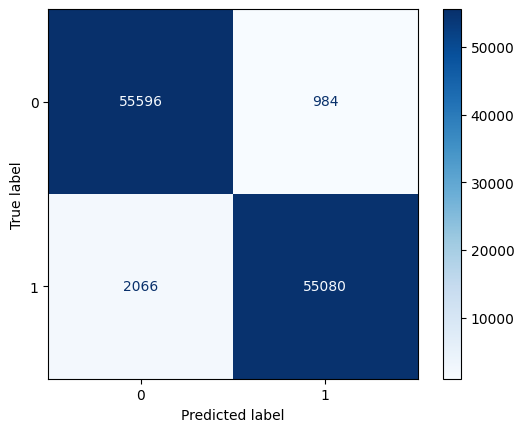

-------------Classificationn_report---------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56580
           1       0.98      0.96      0.97     57146

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

-------------More Specific classification_report----------
Accuracy:- 0.9731811547051685
Sensitivity:- 0.9638469884156371
Specificity:- 0.9826086956521739
F1-Score:- 0.973058917056797
---------------------ROC-------------------


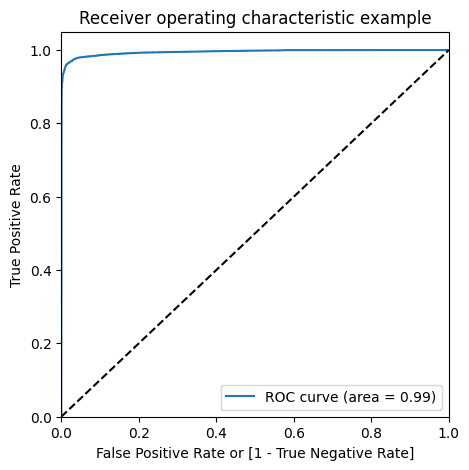

In [16]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(C=0.01)
logistic_model = logistic.fit(X_train,y_train)
display_test_results("Logistic Regression", logistic_model)

## RANDOM FOREST

---------------Confusion Matrix--------------
[[56213   367]
 [ 2878 54268]]


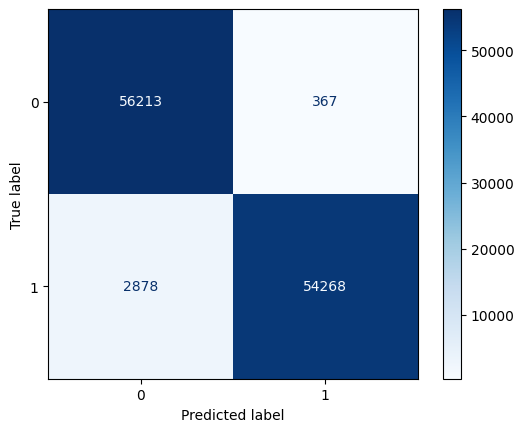

-------------Classificationn_report---------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     56580
           1       0.99      0.95      0.97     57146

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

-------------More Specific classification_report----------
Accuracy:- 0.9714665072191055
Sensitivity:- 0.9496377699226543
Specificity:- 0.993513609049134
F1-Score:- 0.9709700217389359
---------------------ROC-------------------


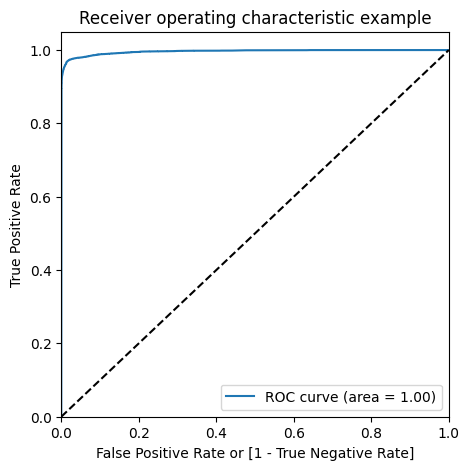

In [17]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(bootstrap=True,max_depth=5,min_samples_leaf=50,min_samples_split=50,max_features=10,n_estimators=100)
random_forest_model.fit(X_train,y_train)
display_test_results("Random Forest",random_forest_model)

**Let's Summarize the results:**

In [18]:
results.sort_values(by="ROC", ascending=False)

,Model,Accuracy,F1 Score,ROC
1,Random Forest,0.971467,0.970970,0.995909
0,Logistic Regression,0.973181,0.973059,0.994724
